# Depth-First 

Depth-first traversal or Depth-first Search is an algorithm to look at all the vertices of a graph or tree data structure. It is a recursive algorithm that uses the concept of backtracking. It involves thorough searches of all the nodes by going ahead if potential, else by backtracking. Here, the word backtrack means once you are moving forward and there are not any more nodes along the present path, you progress backward on an equivalent path to seek out nodes to traverse. All the nodes are progressing to be visited on the current path until all the unvisited nodes are traversed after which subsequent paths are going to be selected.

## Recursive Method
**Implemented using stack**. A standard Depth-First Search implementation puts every vertex of the graph into one in all 2 categories: 
 

1.   Visited
2.   Not Visited

The only purpose of this algorithm is to visit all the vertex of the graph avoiding cycles. The DSF algorithm follows as:

1.   Start by putting any one of the graph's vertex on top of the stack.
2.   Take the top item of the stack and add it to the visited list of the vertex.
3.   Create a list of that adjacent node of the vertex. Add the ones which aren't in the visited list of vertexes to the top of the stack.
4.   Keep repeating steps 2 and 3 until the stack is empty.

## Pseudocode
```
DFS(G,u)
  u.visited = True
  for each v ∈ G.Adj[u]
    if v.visited == false
       DFS(G,v)

init(){
  For each u ∈ G
    u.visited = false
  For each u ∈ G
    DFS(G, u)
}
```

The `init()` function executes `DFS()` function on every node because many times, a graph may contain two different disconnected part and therefore to make sure that we have visited every vertex, we can also run the `DFS()` algorithm at every node.

## Example
Consider the following graph:

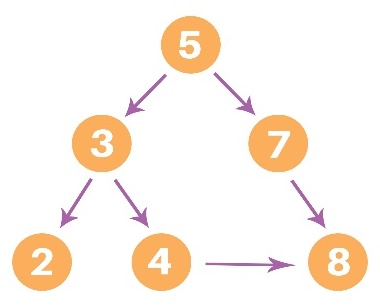


In [3]:
# Using a Python dictionary to act as an adjacency list
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

# Set to keep track of visited nodes of graph.
visited = set() 

# Function for dfs 
def dfs(visited, graph, node):  
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
3
2
4
8
7


# Breadth-First Search

Breadth-First Search (BFS) is an algorithm used for traversing graphs or trees. Traversing means visiting each node of the graph. BFS is a recursive algorithm to search all the vertices of a **graph** or a **tree** (the only difference is that the graph may contain cycles, so we may traverse to the same node again). BFS  the process of traversing each node of the graph, a standard BFS algorithm traverses each vertex of the graph into two parts: 

1. Visited
2. Not Visited

So, the purpose of the algorithm is to visit all the vertex while avoiding cycles. 

## Recursive Method
BFS starts from a node, then it checks all the nodes at distance one from the beginning node, then it checks all the nodes at distance two, and so on. So as to recollect the nodes to be visited, **BFS uses a queue**.

The steps of the algorithm work as follow:

1. Start by putting any one of the graph’s vertices at the back of the queue.
2. Now take the front item of the queue and add it to the visited list.
3. Create a list of that vertex's adjacent nodes. Add those which are not within the visited list to the rear of the queue.
4. Keep continuing steps two and three till the queue is empty.

## Pseudocode

```
create a queue Q
mark v as visited and put v into Q 
while Q is non-empty
  remove the head u of Q
  mark and enqueue all (unvisited) neighbors of u
```

## Example
Consider the following graph:

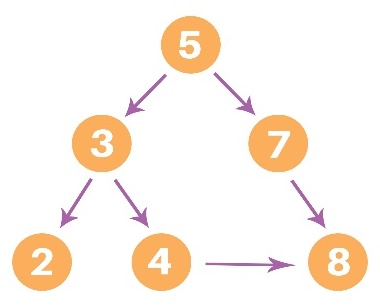

In [ ]:
# Use dictionary
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

# List for visited nodes.
visited = []

# Initialise a queue
queue = []     

# Function for BFS
def bfs(visited, graph, node): 
  visited.append(node)
  queue.append(node)

  # Creating loop to visit each node
  while queue:          
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
# Function call
bfs(visited, graph, '5')   

Following is the Breadth-First Search
5 3 7 2 4 8 

## Uniform Cost Search

BFS only returns an optimal path if all edges have the same cost (e.g. length). Uniform-cost search (UCS) is a similar algorithm that finds optimal paths even when **edge costs vary**.

**Frontier** (or **fringe**) in a search algorithm contains **states that have been seen but their outgoing edges have not yet been explored**. BFS stores the frontier as a **queue**; DFS stores it as a **stack**. Uniform-cost search stores the frontier as a **priority queue**. So, in each iteration of the search loop, we explore neighbors of the best state (i.e. lowest cost, shortest path) seen so far.

### Assumptions

*   Edge costs are always positive, and
*   All edge costs are $>= b$, where $b$ is some minimum non-zero cost.

### Details

When we're using BFS on a problem where all edges have the same cost, we can safely return as soon as we see a goal state. There's no need to put the goal state back into the frontier for further processing. Consider the following example:

![Cities](images/cities.png)



In [13]:
import queue as Q

def search(graph, start, end):
    if start not in graph:
        raise TypeError(str(start) + ' not found in graph !')
        return
    if end not in graph:
        raise TypeError(str(end) + ' not found in graph !')
        return
    
    queue = Q.PriorityQueue()
    queue.put((0, [start]))
    
    while not queue.empty():
        node = queue.get()
        current = node[1][len(node[1]) - 1]
        
        if end in node[1]:
            print("Path found: " + str(node[1]) + ", Cost = " + str(node[0]))
            break
        
        cost = node[0]
        for neighbor in graph[current]:
            temp = node[1][:]
            temp.append(neighbor)
            queue.put((cost + graph[current][neighbor], temp))
        
def readGraph():
    lines = int(input())
    graph = {}
    
    for line in range(lines):
        line = input()
            
        tokens = line.split()
        node = tokens[0]
        graph[node] = {}
        
        for i in range(1, len(tokens) - 1, 2):
            # print(node, tokens[i], tokens[i + 1])
            # graph.addEdge(node, tokens[i], int(tokens[i + 1]))
            graph[node][tokens[i]] = int(tokens[i + 1])
    return graph

def main():
    graph = readGraph()
    search(graph, 'RimnicuVilcea', 'Zerind')

# Driver program
if __name__ == "__main__":
    main()

"""
Sample Map Input:

14
Arad Zerind 75 Timisoara 118 Sibiu 140
Zerind Oradea 71 Arad 75
Timisoara Arad 118 Lugoj 111
Sibiu Arad 140 Oradea 151 Fagaras 99 RimnicuVilcea 80
Oradea Zerind 71 Sibiu 151
Lugoj Timisoara 111 Mehadia 70
RimnicuVilcea Sibiu 80 Pitesti 97 Craiova 146
Mehadia Lugoj 70 Dobreta 75
Craiova Dobreta 120 RimnicuVilcea 146 Pitesti 138
Pitesti RimnicuVilcea 97 Craiova 138 Bucharest 101
Fagaras Sibiu 99 Bucharest 211
Dobreta Mehadia 75 Craiova 120
Bucharest Fagaras 211 Pitesti 101 Giurgiu 90
Giurgiu Bucharest 90
"""

Path found: ['RimnicuVilcea', 'Sibiu', 'Arad', 'Zerind'], Cost = 295


'\nSample Map Input:\n\n14\nArad Zerind 75 Timisoara 118 Sibiu 140\nZerind Oradea 71 Arad 75\nTimisoara Arad 118 Lugoj 111\nSibiu Arad 140 Oradea 151 Fagaras 99 RimnicuVilcea 80\nOradea Zerind 71 Sibiu 151\nLugoj Timisoara 111 Mehadia 70\nRimnicuVilcea Sibiu 80 Pitesti 97 Craiova 146\nMehadia Lugoj 70 Dobreta 75\nCraiova Dobreta 120 RimnicuVilcea 146 Pitesti 138\nPitesti RimnicuVilcea 97 Craiova 138 Bucharest 101\nFagaras Sibiu 99 Bucharest 211\nDobreta Mehadia 75 Craiova 120\nBucharest Fagaras 211 Pitesti 101 Giurgiu 90\nGiurgiu Bucharest 90\n'